In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


First five rows of the dataset:
   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2 

After applying Min-Max Scaling (0 to 1 range):
   petal length (cm)  petal width (cm)
0           0.067797          0.041667
1           0.067797          0.041667
2           0.050847          0.041667
3           0.084746          0.041667
4           0.067797          0.041667 

Observation:
- Petal length and width had different numeric ranges initially.
- Scaling brings both to the same scale, which helps K-Means measure distances fairly.



C:\Users\AARYAMAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AARYAMAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AARYAMAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AARYAMAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

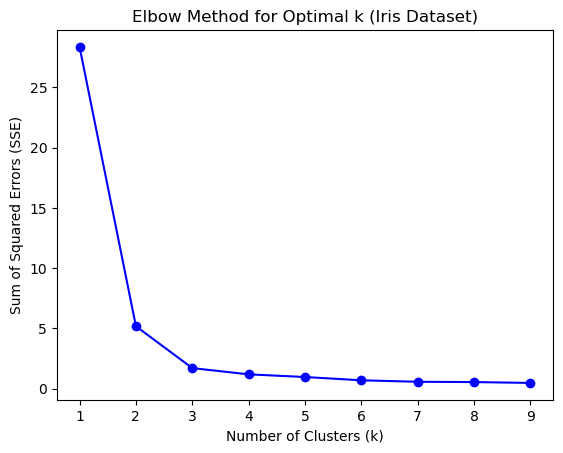

From the elbow plot, the optimal number of clusters (k) is approximately: 5

Cluster centers (in scaled values):
[[0.7740113  0.81510417]
 [0.07830508 0.06083333]
 [0.55867014 0.51041667]] 



C:\Users\AARYAMAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


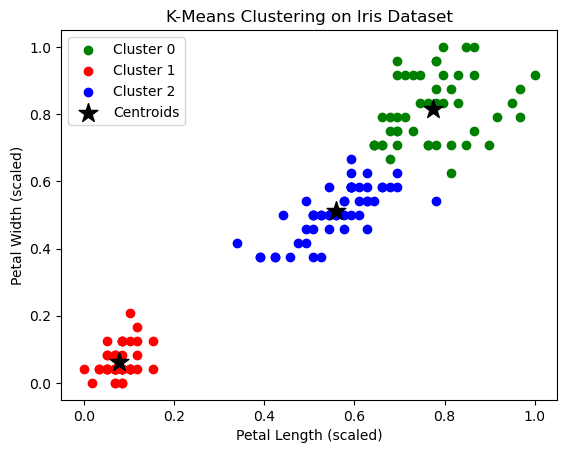

Interpretation:
- The optimal number of clusters (k) = 3.
- The clusters correspond well to the three Iris flower species.
- Scaling was beneficial since it equalized feature ranges (petal length & width).
- The scatter plot shows clear separation between clusters.
- Cluster centers represent the average scaled petal length and width for each group.


In [1]:
# --- Step 1: Import required libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- Step 2: Load the Iris dataset ---
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Keep only petal length and petal width
df = df[['petal length (cm)', 'petal width (cm)']]

print("First five rows of the dataset:")
print(df.head(), "\n")

# --- Step 3: Check scaling effect ---
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=['petal length (cm)', 'petal width (cm)'])

print("After applying Min-Max Scaling (0 to 1 range):")
print(df_scaled.head(), "\n")

print("Observation:")
print("- Petal length and width had different numeric ranges initially.")
print("- Scaling brings both to the same scale, which helps K-Means measure distances fairly.\n")

# --- Step 4: Elbow Method to find optimal k ---
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    sse.append(km.inertia_)

plt.plot(k_rng, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k (Iris Dataset)')
plt.show()

# Determine the elbow point
diff = np.diff(sse)
diff2 = np.diff(diff)
optimal_k = np.argmin(diff2) + 2  # Approx elbow
print(f"From the elbow plot, the optimal number of clusters (k) is approximately: {optimal_k}\n")

# --- Step 5: Fit model with optimal k (≈3) ---
k = 3
km = KMeans(n_clusters=k, random_state=42)
y_predicted = km.fit_predict(df_scaled)
df_scaled['Cluster'] = y_predicted

print("Cluster centers (in scaled values):")
print(km.cluster_centers_, "\n")

# --- Step 6: Visualize final clusters ---
plt.scatter(df_scaled[df_scaled.Cluster == 0]['petal length (cm)'], 
            df_scaled[df_scaled.Cluster == 0]['petal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df_scaled[df_scaled.Cluster == 1]['petal length (cm)'], 
            df_scaled[df_scaled.Cluster == 1]['petal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df_scaled[df_scaled.Cluster == 2]['petal length (cm)'], 
            df_scaled[df_scaled.Cluster == 2]['petal width (cm)'], color='blue', label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            color='black', marker='*', s=200, label='Centroids')

plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

# --- Step 7: Interpretation ---
print("Interpretation:")
print(f"- The optimal number of clusters (k) = {k}.")
print("- The clusters correspond well to the three Iris flower species.")
print("- Scaling was beneficial since it equalized feature ranges (petal length & width).")
print("- The scatter plot shows clear separation between clusters.")
print("- Cluster centers represent the average scaled petal length and width for each group.")
